In [1]:
import torch
import glob
import os
import librosa
import numpy as np
import yaml

%cd '/Users/bapt/Desktop/ENSAE/3ème Année/Advanced Machine Learning/Multispeaker-Text-to-Speech-Synthesis/Encoder'


/Users/bapt/Desktop/ENSAE/3ème Année/Advanced Machine Learning/Multispeaker-Text-to-Speech-Synthesis/Encoder


In [77]:
from umap.umap_ import UMAP
from dataload import EncoderDataset
from model import SpeakerEncoder
from params import hparams as hp
import random
import matplotlib.pyplot as plt 

In [38]:
test_dataset = EncoderDataset(train=False,
                                   shuffle=True)
n_speakers = len(test_dataset)
speakers = random.sample(list(range(n_speakers)), 10)

In [49]:
model = SpeakerEncoder()
save_model_path = os.path.join(hp.train.checkpoint_dir, "model_final.pt")
state_dict = torch.load(save_model_path, map_location=torch.device(hp.device))
model.load_state_dict(state_dict)

/var/folders/lz/8pkgsxns00x5kr16mdb6sc300000gn/T/ipykernel_6267/652133913.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(save_model_path, map_lo

<All keys matched successfully>

In [72]:
embeddings = []
for speaker in speakers: 
    embeddings += (model(test_dataset[speaker]).tolist())
embeddings

[[0.0413924939930439,
  0.10948958992958069,
  0.01864120364189148,
  0.12371654808521271,
  -0.13914494216442108,
  -0.07530121505260468,
  0.09539535641670227,
  -0.0859144777059555,
  -0.020487695932388306,
  0.32528796792030334,
  -0.07036551088094711,
  0.09786935895681381,
  -0.08829010277986526,
  0.07246506214141846,
  -0.10499819368124008,
  0.13761775195598602,
  0.0398857407271862,
  -0.09645907580852509,
  0.3066016435623169,
  -0.02834533527493477,
  -0.20075549185276031,
  -0.11994481086730957,
  0.06434841454029083,
  -0.15723100304603577,
  0.007485078647732735,
  0.12147853523492813,
  -0.09386622905731201,
  -0.12400652468204498,
  -0.14720864593982697,
  -0.04846348613500595,
  -0.13855038583278656,
  0.125738263130188,
  -0.19370359182357788,
  -0.04317937418818474,
  -0.15746907889842987,
  -0.041065577417612076,
  0.1536170244216919,
  0.02029917947947979,
  -0.15547454357147217,
  -0.17807304859161377,
  0.11860103160142899,
  -0.07452903687953949,
  -0.155670642

In [73]:
reducer = UMAP()
embeddings_reduced = reducer.fit_transform(embeddings)

/Users/bapt/anaconda3/envs/MSVoiceCloning/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


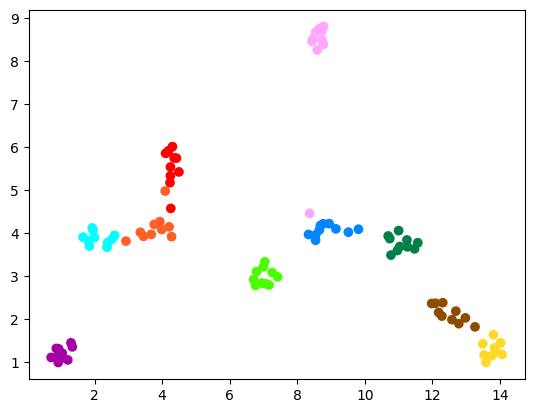

In [81]:
colormap = np.array([
    [76, 255, 0],
    [0, 127, 70],
    [255, 0, 0],
    [255, 217, 38],
    [0, 135, 255],
    [165, 0, 165],
    [255, 167, 255],
    [0, 255, 255],
    [255, 96, 38],
    [142, 76, 0],
    [33, 0, 127],
    [0, 0, 0],
    [183, 183, 183],
], dtype=float) / 255

ground_truth = np.repeat(np.arange(10), 10)
colors = [colormap[i] for i in ground_truth]

plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1], c=colors)
plt.show()

In [3]:
torch.LongTensor(10)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [2]:
import torch

In [4]:
c_mask = pos.ne(0).type(t.float)

NameError: name 'pos' is not defined